# **Image Enhancement**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

# **Gamma Correction**

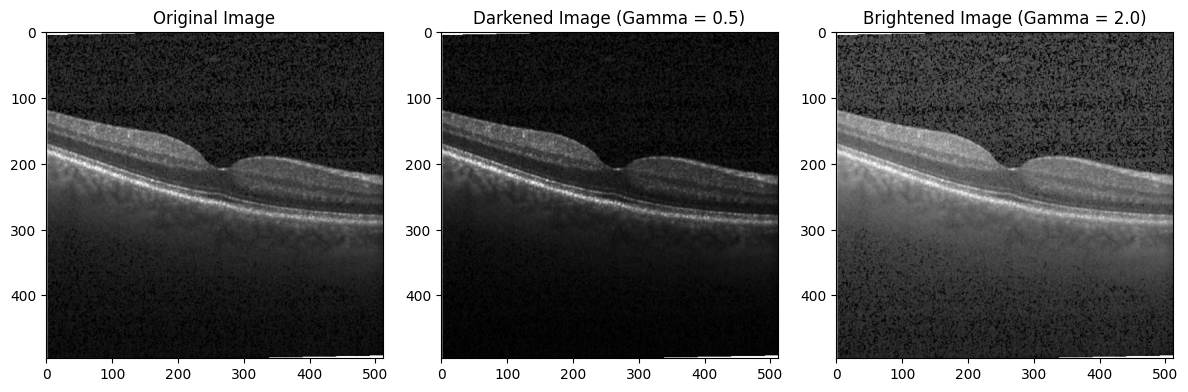

In [22]:
image_path = "/content/drive/MyDrive/Medical_Image/e2.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

def gamma_correction(image, gamma):
    inv_gamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** inv_gamma * 255 for i in np.arange(256)]).astype("uint8")
    return cv2.LUT(image, table)

gamma_bright = gamma_correction(image, gamma=0.75)
gamma_dark = gamma_correction(image, gamma=1.5)
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(gamma_bright, cmap='gray')
plt.title("Darkened Image (Gamma = 0.5)")

plt.subplot(1, 3, 3)
plt.imshow(gamma_dark, cmap='gray')
plt.title("Brightened Image (Gamma = 2.0)")

plt.tight_layout()

# **CLAHE**

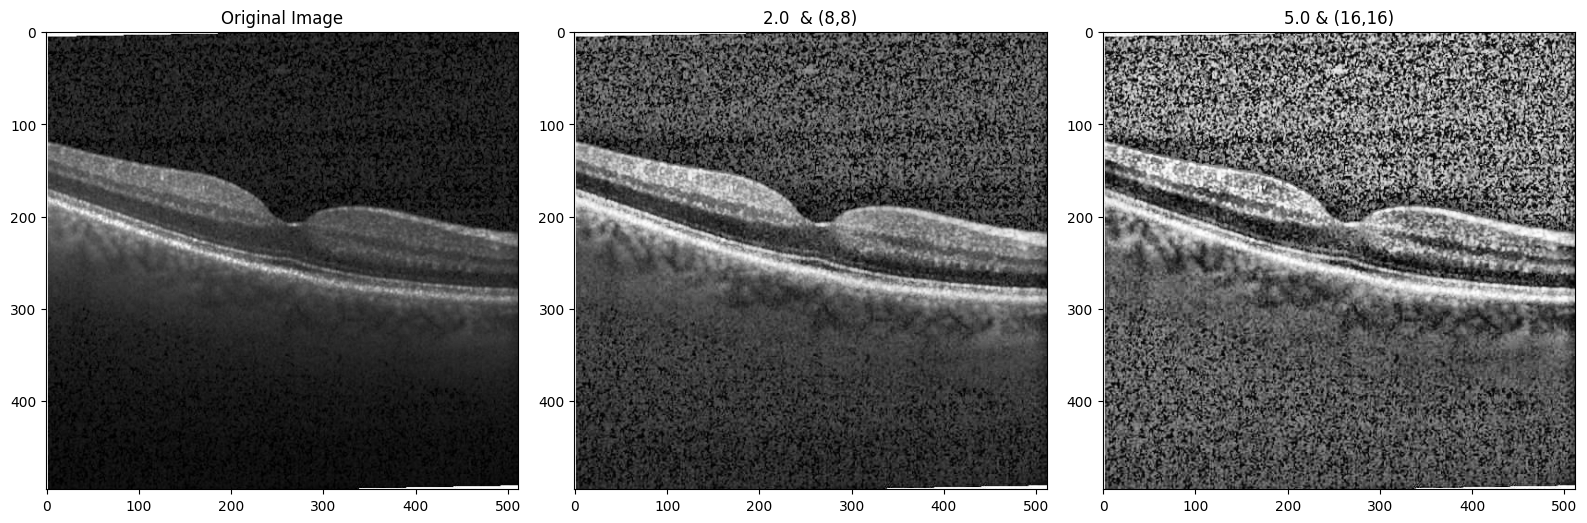

In [23]:
image_path = ("/content/drive/MyDrive/Medical_Image/e2.jpg")
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

def apply_clahe(imagel, clip_limit, grid_size):
  clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=grid_size)
  return clahe.apply(image)

clahe1 = apply_clahe(image, clip_limit=2.0, grid_size=(8,8))
clahe2 = apply_clahe(image, clip_limit=5.0, grid_size=(16,16))

plt.figure(figsize=(16,6))

plt.subplot(1,3,1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(clahe1, cmap='gray')
plt.title("2.0  & (8,8)")

plt.subplot(1,3,3)
plt.imshow(clahe2, cmap='gray')
plt.title("5.0 & (16,16)")

plt.tight_layout()

# Average **Filtering**

Text(0.5, 1.0, 'Gaussian Blur')

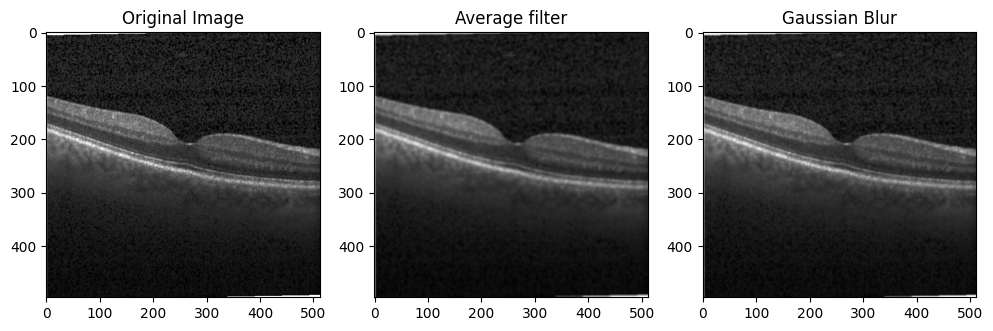

In [24]:
image_path = ("/content/drive/MyDrive/Medical_Image/e2.jpg")
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

def simple_averaging(image, kernel_size):
  return cv2.blur(image, (kernel_size, kernel_size))

def gaussian_smoothing(image, kernel_size):
  return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

avg_image = simple_averaging(image, kernel_size=5)
gaussian_image = gaussian_smoothing(image, kernel_size=5)

plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(avg_image, cmap='gray')
plt.title("Average filter")

plt.subplot(1,3,3)
plt.imshow(gaussian_image, cmap='gray')
plt.title("Gaussian Blur")

# **Fournier** **Filtering**

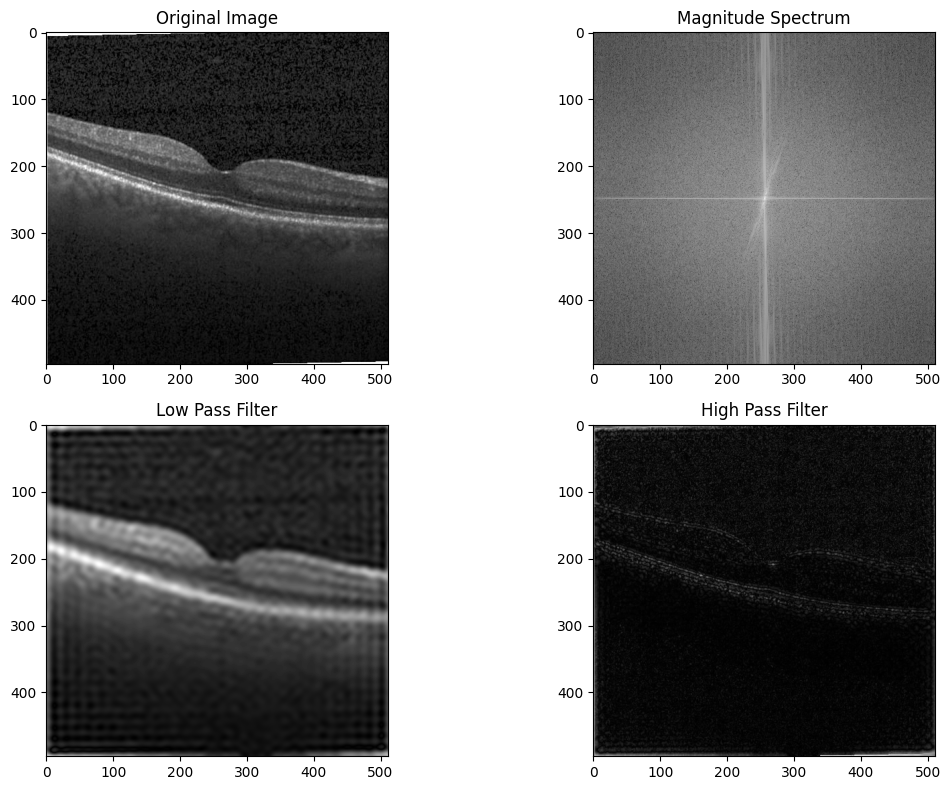

In [25]:
image_path = ("/content/drive/MyDrive/Medical_Image/e2.jpg")
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

def fourier_transform(image):
   dft = np.fft.fft2(image)
   dft_shift = np.fft.fftshift(dft)
   magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)
   return dft, dft_shift, magnitude_spectrum


def low_pass_filter(dft_shift, size=30):
  rows, cols = dft_shift.shape
  crow, ccol = rows // 2, cols // 2
  mask = np.zeros_like(dft_shift)
  mask[crow-size:crow + size, ccol-size:ccol +size] = 1
  return dft_shift * mask

def high_pass_filter(dft_shift, size=30):
  rows, cols = dft_shift.shape
  crow, ccol = rows // 2, cols // 2
  mask = np.ones_like(dft_shift)
  mask[crow-size:crow + size, ccol-size:ccol +size] = 0
  return dft_shift * mask

def inverse_fourier_transform(dft_shift):
  dft_ishift = np.fft.ifftshift(dft_shift)
  img_back = np.fft.ifft2(dft_ishift)
  img_back = np.abs(img_back)
  return img_back

dft, dft_shift, magnitude_spectrum = fourier_transform(image)

lpf_shift = low_pass_filter(dft_shift.copy(), size=30)
hpf_shift = high_pass_filter(dft_shift.copy(), size=30)

lpf_image = inverse_fourier_transform(lpf_shift)
hpf_image = inverse_fourier_transform(hpf_shift)

plt.figure(figsize= (12,8))

plt.subplot(2,2,1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

plt.subplot(2,2,2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum")

plt.subplot(2,2,3)
plt.imshow(lpf_image, cmap='gray')
plt.title("Low Pass Filter")

plt.subplot(2,2,4)
plt.imshow(hpf_image, cmap='gray')
plt.title("High Pass Filter")

plt.tight_layout()